In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from matplotlib import font_manager, rc

from IPython.display import Image # 이미지 삽입

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = [25,15]
plt.rcParams['font.size'] = 25

In [2]:
# outliar 제거 함수 (IQR 설정) (1)
def remove_out(dataframe, remove_col) :
    dff = dataframe
    for k in remove_col :
        level_1q = dff[k].quantile(0.25)
        level_3q = dff[k].quantile(0.75)
        IQR = level_3q - level_1q
        rev_range = 1.5
        outliar_h = dff[k] >= level_3q + (rev_range * IQR)
        outliar_l = dff[k] <= level_1q - (rev_range * IQR)
        a=dff[outliar_h].index
        b=dff[outliar_l].index
        dff.drop(a, inplace=True)
        dff.drop(b, inplace=True)

#그래프 2개 비교 (차이 비교) -- 숫자를 표시안함
def difference(dataframe1, dataframe2) :    
    diff = np.subtract(dataframe1,dataframe2)
    
    # diff가 0보다 작은 index 찾는 것
    diff_down = dataframe2.loc[diff.loc[diff < 0].index]
    display(diff_down.index)
    
    # diff의 값을 평균내는 부분
    print(diff.describe())
    
    # 20%인 위치 값 찾기
    try :
        sorted_diff = diff.sort_values()
        ten_percent_index = int(len(sorted_diff) * 0.1)
        ten_percent_value = sorted_diff.iloc[ten_percent_index]
        print("10% value: ", ten_percent_value)
    except IndexError as e:
        if "single positional indexer is out-of-bounds" in str(e):
            print("매우나쁨 농도가 없습니다.")
        else:
            raise e
    finally :
        # 숫자 넣는 부분, height + 0.25로 숫자 약간 위로 위치하게 조정
        plt.plot(dataframe1.index,diff)
        for i in range(len(dataframe1.index)):
            height = diff[i]
            plt.text(dataframe1.index[i], height + 0.01, '%.2f' %height, ha='center', va='bottom', size = 25)
        plt.title("Difference between airm-airKorea")
        plt.xlabel("Hour")
        plt.ylabel("diff")
        plt.show()
    
# 아림의 미세먼지 농도가 매우나쁨 이상일 때, airKorea의 미세먼지 농도의 평가
def air_quality_label(pm25):
    if pm25 <= 15:
        return '좋음'
    elif pm25 <= 35:
        return '보통'
    elif pm25 <= 75:
        return '나쁨'
    else:
        return '매우 나쁨'

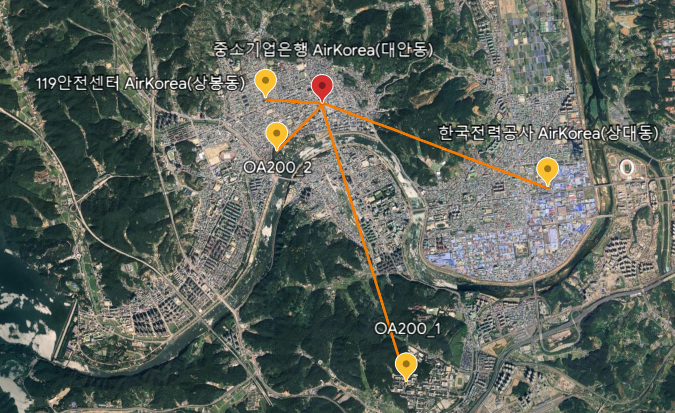

In [3]:
display(Image("./보고서 사진/위치.png"))

# SHIFT 된 부분의 이유를 찾아보자

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9696\3195744685.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  arim_data_2_avg = arim_data_2.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


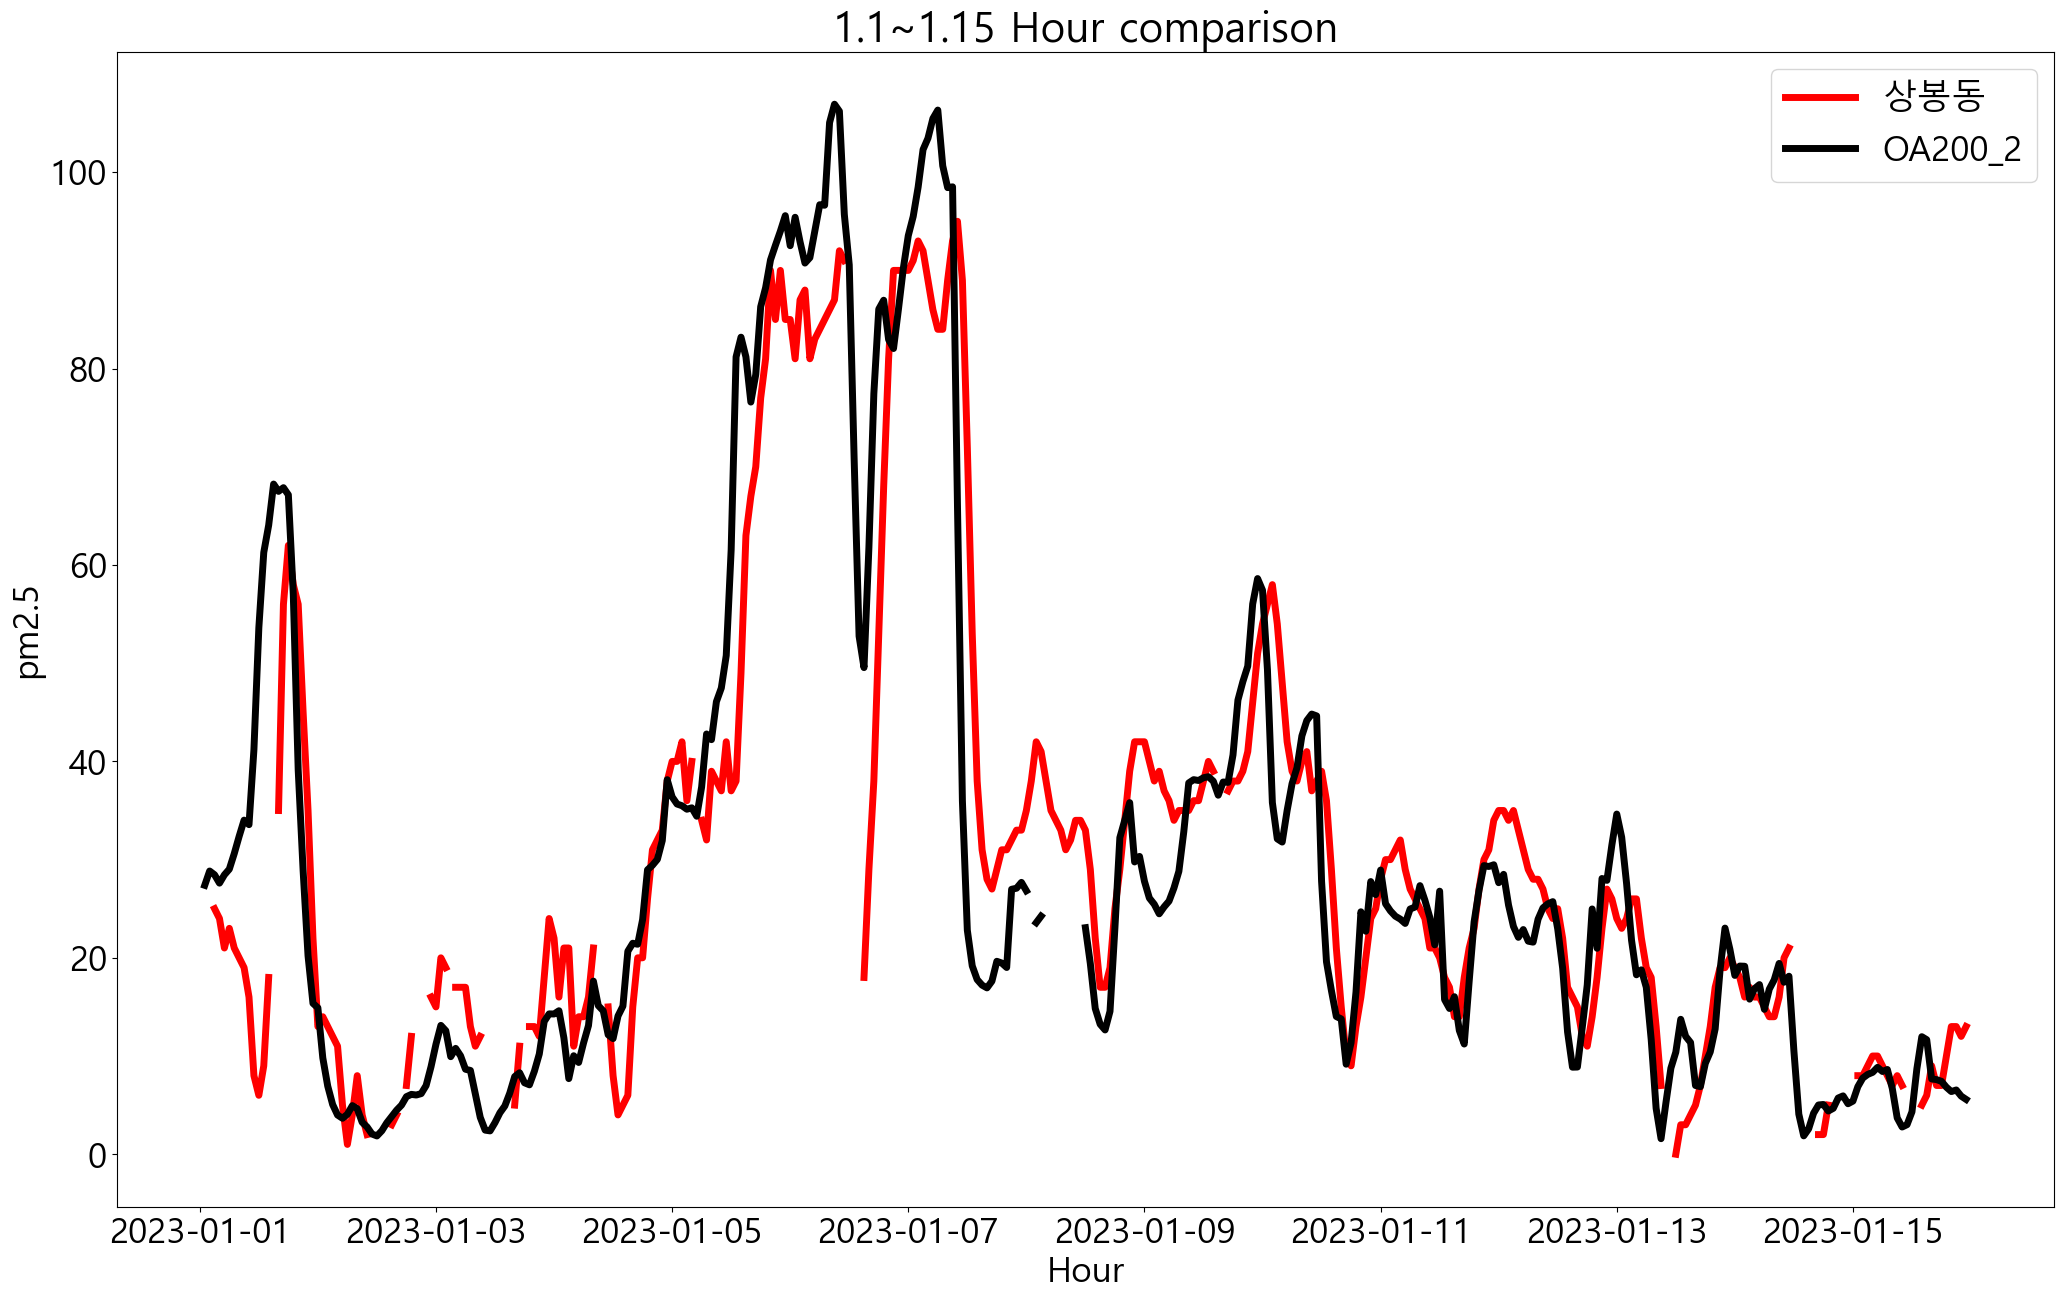

In [4]:
arim_data_2 = pd.read_csv('./OA200_2/OA2002_01.01~01.15.csv')
airKorea_data_sangbong = pd.read_csv('./AirKorea_상봉동/AirKorea_01.01~01.15.csv')

# arim_data 1.1~1.15 Hour

arim_data_2['reg_date'] = arim_data_2.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_2_avg = arim_data_2.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data_sangbong['date'] = airKorea_data_sangbong.date.apply(pd.to_datetime)


# 그래프 5개 비교
plt.plot(airKorea_data_sangbong.date, airKorea_data_sangbong.pm25, color="red", linewidth="5")
plt.plot(arim_data_2_avg.index, arim_data_2_avg.pm25, color='black', linewidth="5")
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('1.1~1.15 Hour comparison')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9696\3444550279.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  arim_data_2_avg = arim_data_2.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


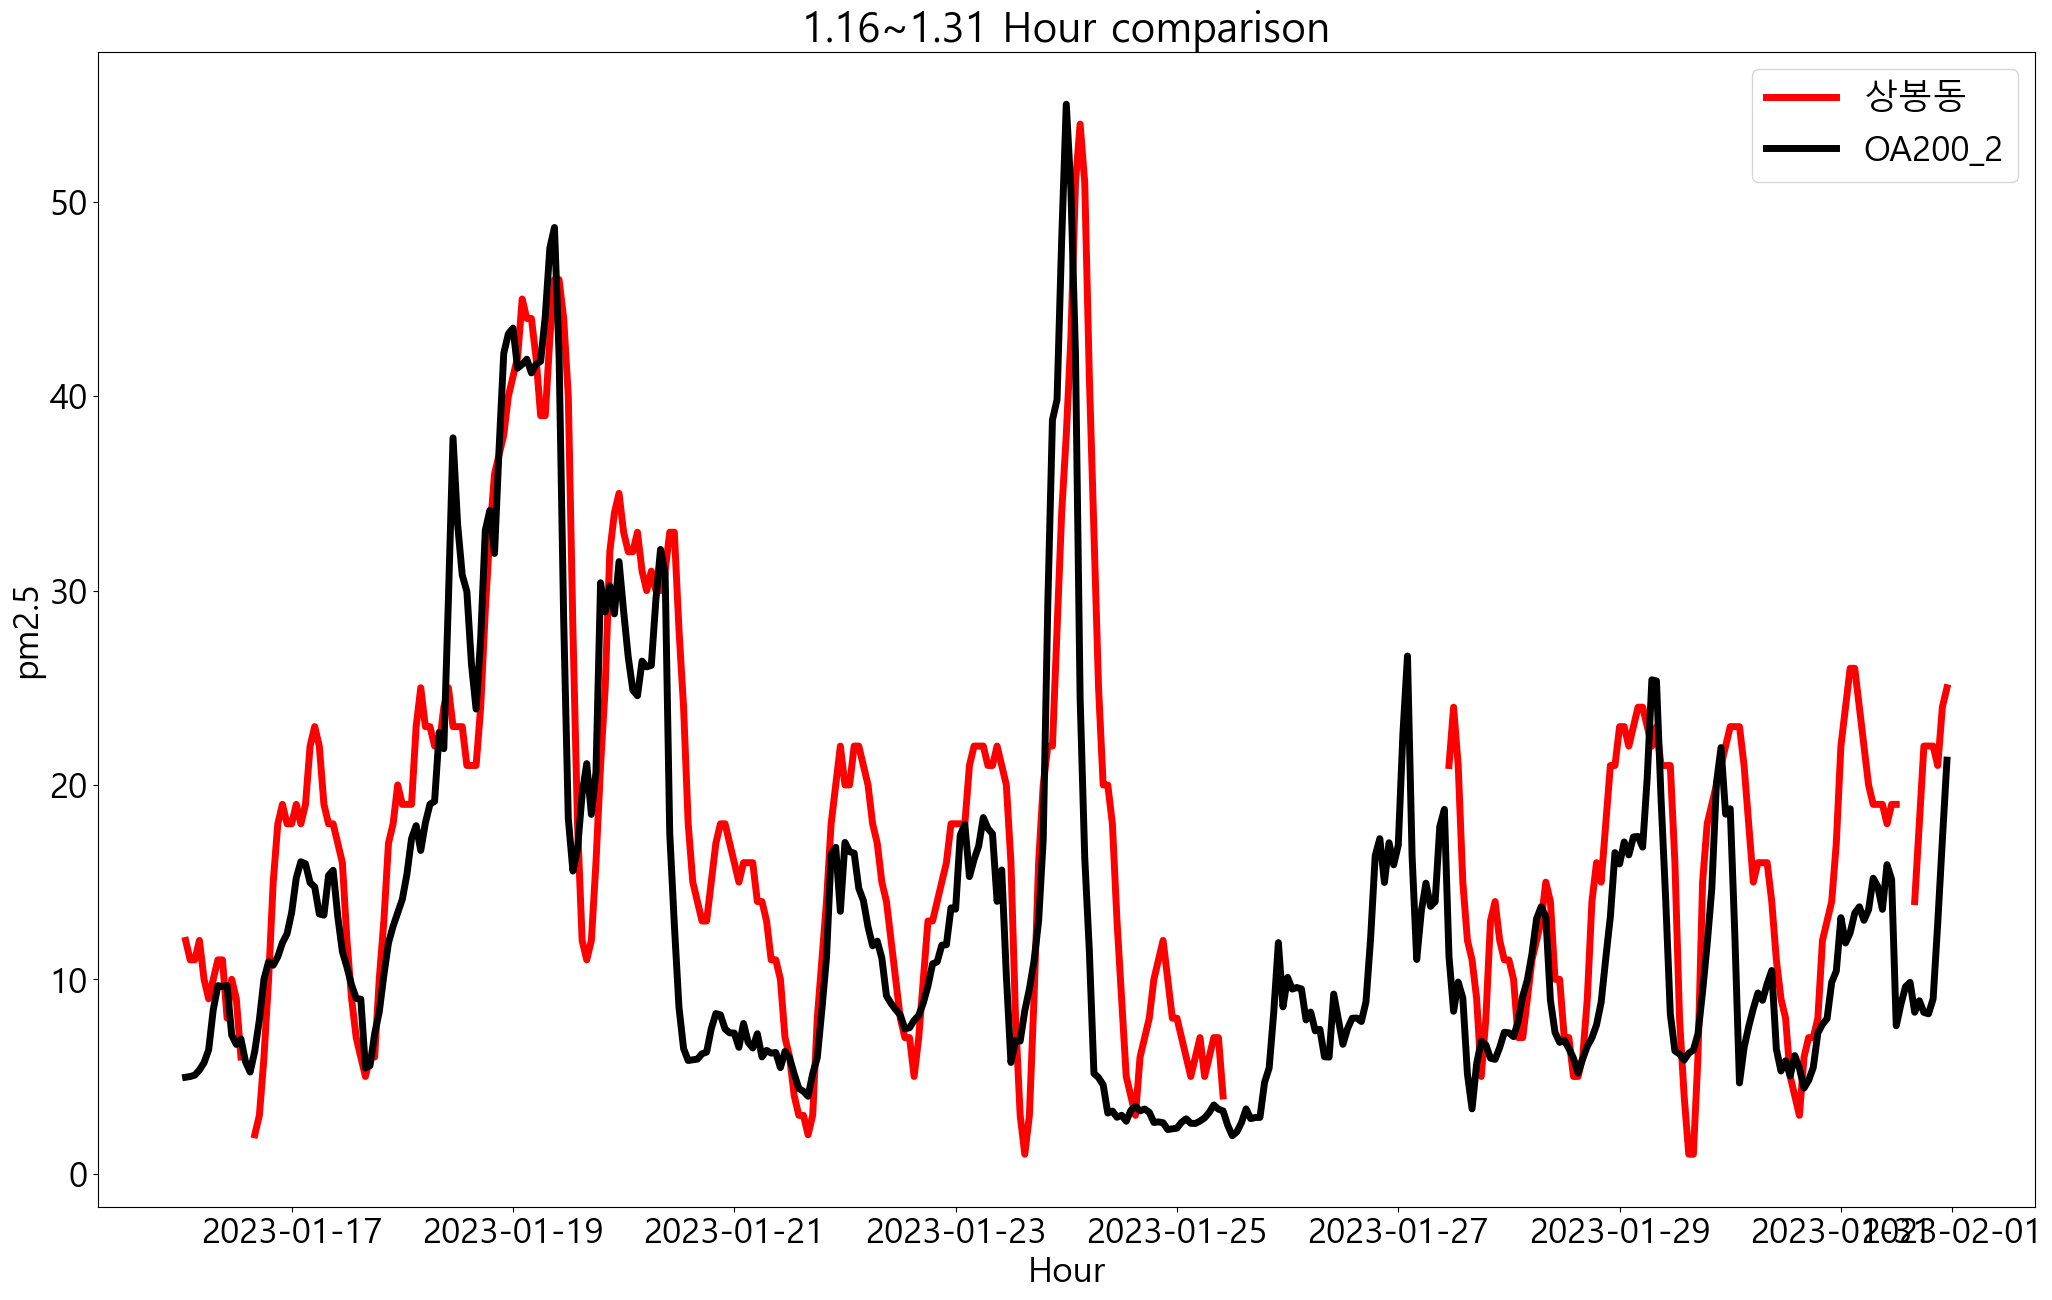

In [5]:
arim_data_2 = pd.read_csv('./OA200_2/OA2002_01.16~01.31.csv')
airKorea_data_sangbong = pd.read_csv('./AirKorea_상봉동/AirKorea_01.16~01.31.csv')

# arim_data 1.1~1.15 Hour

arim_data_2['reg_date'] = arim_data_2.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_2_avg = arim_data_2.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data_sangbong['date'] = airKorea_data_sangbong.date.apply(pd.to_datetime)


# 그래프 5개 비교
plt.plot(airKorea_data_sangbong.date, airKorea_data_sangbong.pm25, color="red", linewidth="5")
plt.plot(arim_data_2_avg.index, arim_data_2_avg.pm25, color='black', linewidth="5")
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('1.16~1.31 Hour comparison')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9696\1463239936.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  arim_data_1_avg = arim_data_1.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


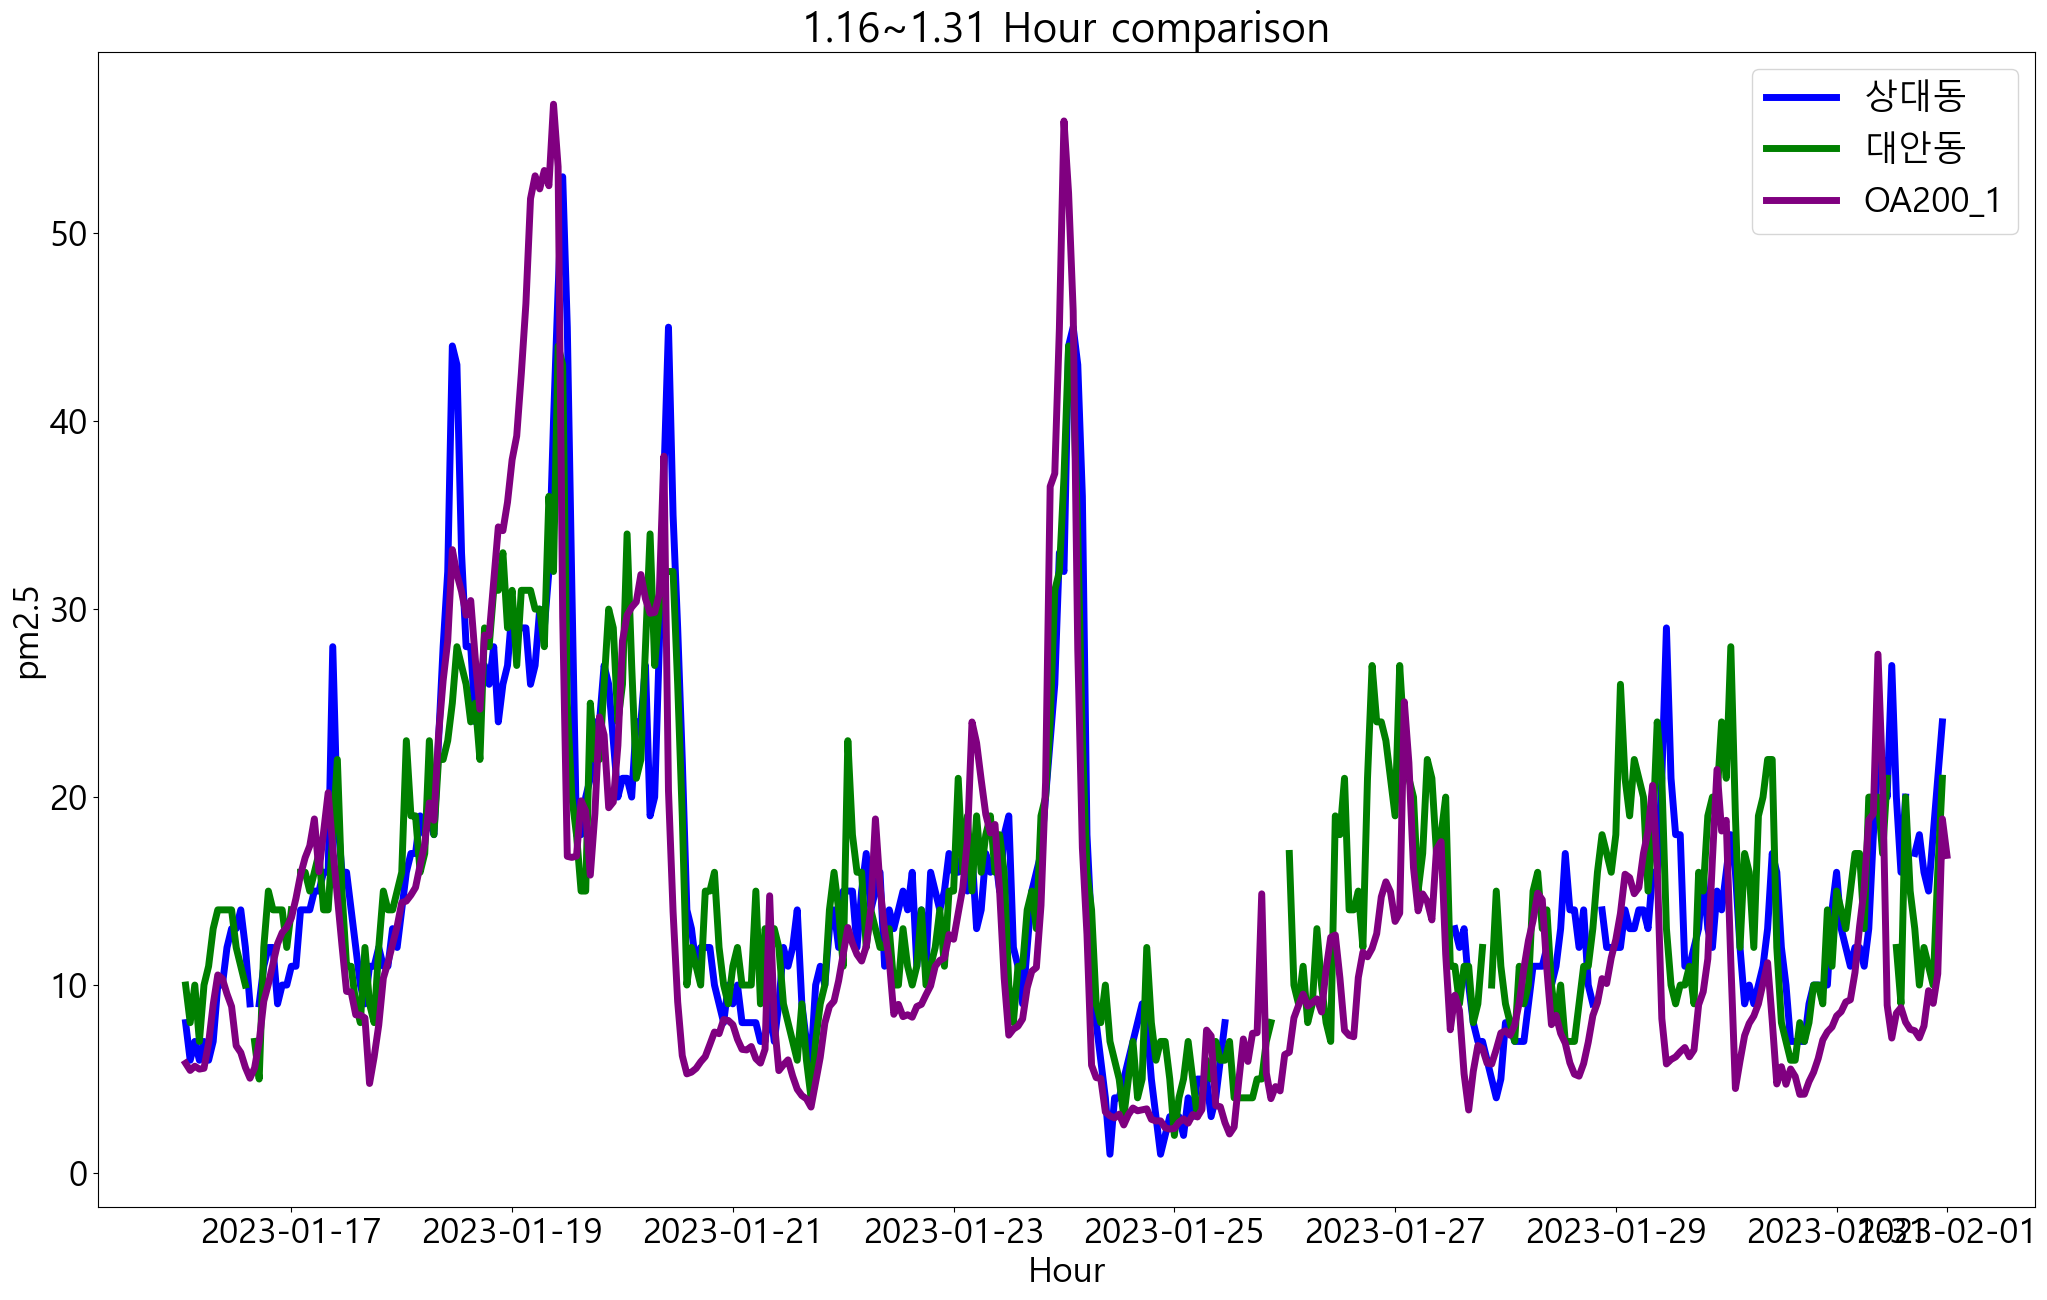

In [8]:
arim_data_1 = pd.read_csv('./OA200_1/OA2001_01.16~01.31.csv')
airKorea_data_sangdae = pd.read_csv('./AirKorea_상대동/AirKorea_01.16~01.31.csv')
airKorea_data_daean = pd.read_csv('./AirKorea_대안동/AirKorea_01.16~01.31.csv')

# arim_data 1.16~1.31 Hour

arim_data_1['reg_date'] = arim_data_1.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_1_avg = arim_data_1.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

# airKorea_data 1.16~1.31 Hour
airKorea_data_sangdae['date'] = airKorea_data_sangdae.date.apply(pd.to_datetime)
airKorea_data_daean['date'] = airKorea_data_daean.date.apply(pd.to_datetime)


# 그래프 5개 비교
plt.plot(airKorea_data_sangdae.date, airKorea_data_sangdae.pm25, color="blue", linewidth="5")
plt.plot(airKorea_data_daean.date, airKorea_data_daean.pm25, color='green', linewidth="5")
plt.plot(arim_data_1_avg.index, arim_data_1_avg.pm25, color='purple', linewidth="5")
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('상대동','대안동','OA200_1'))
plt.title('1.16~1.31 Hour comparison')
plt.show()

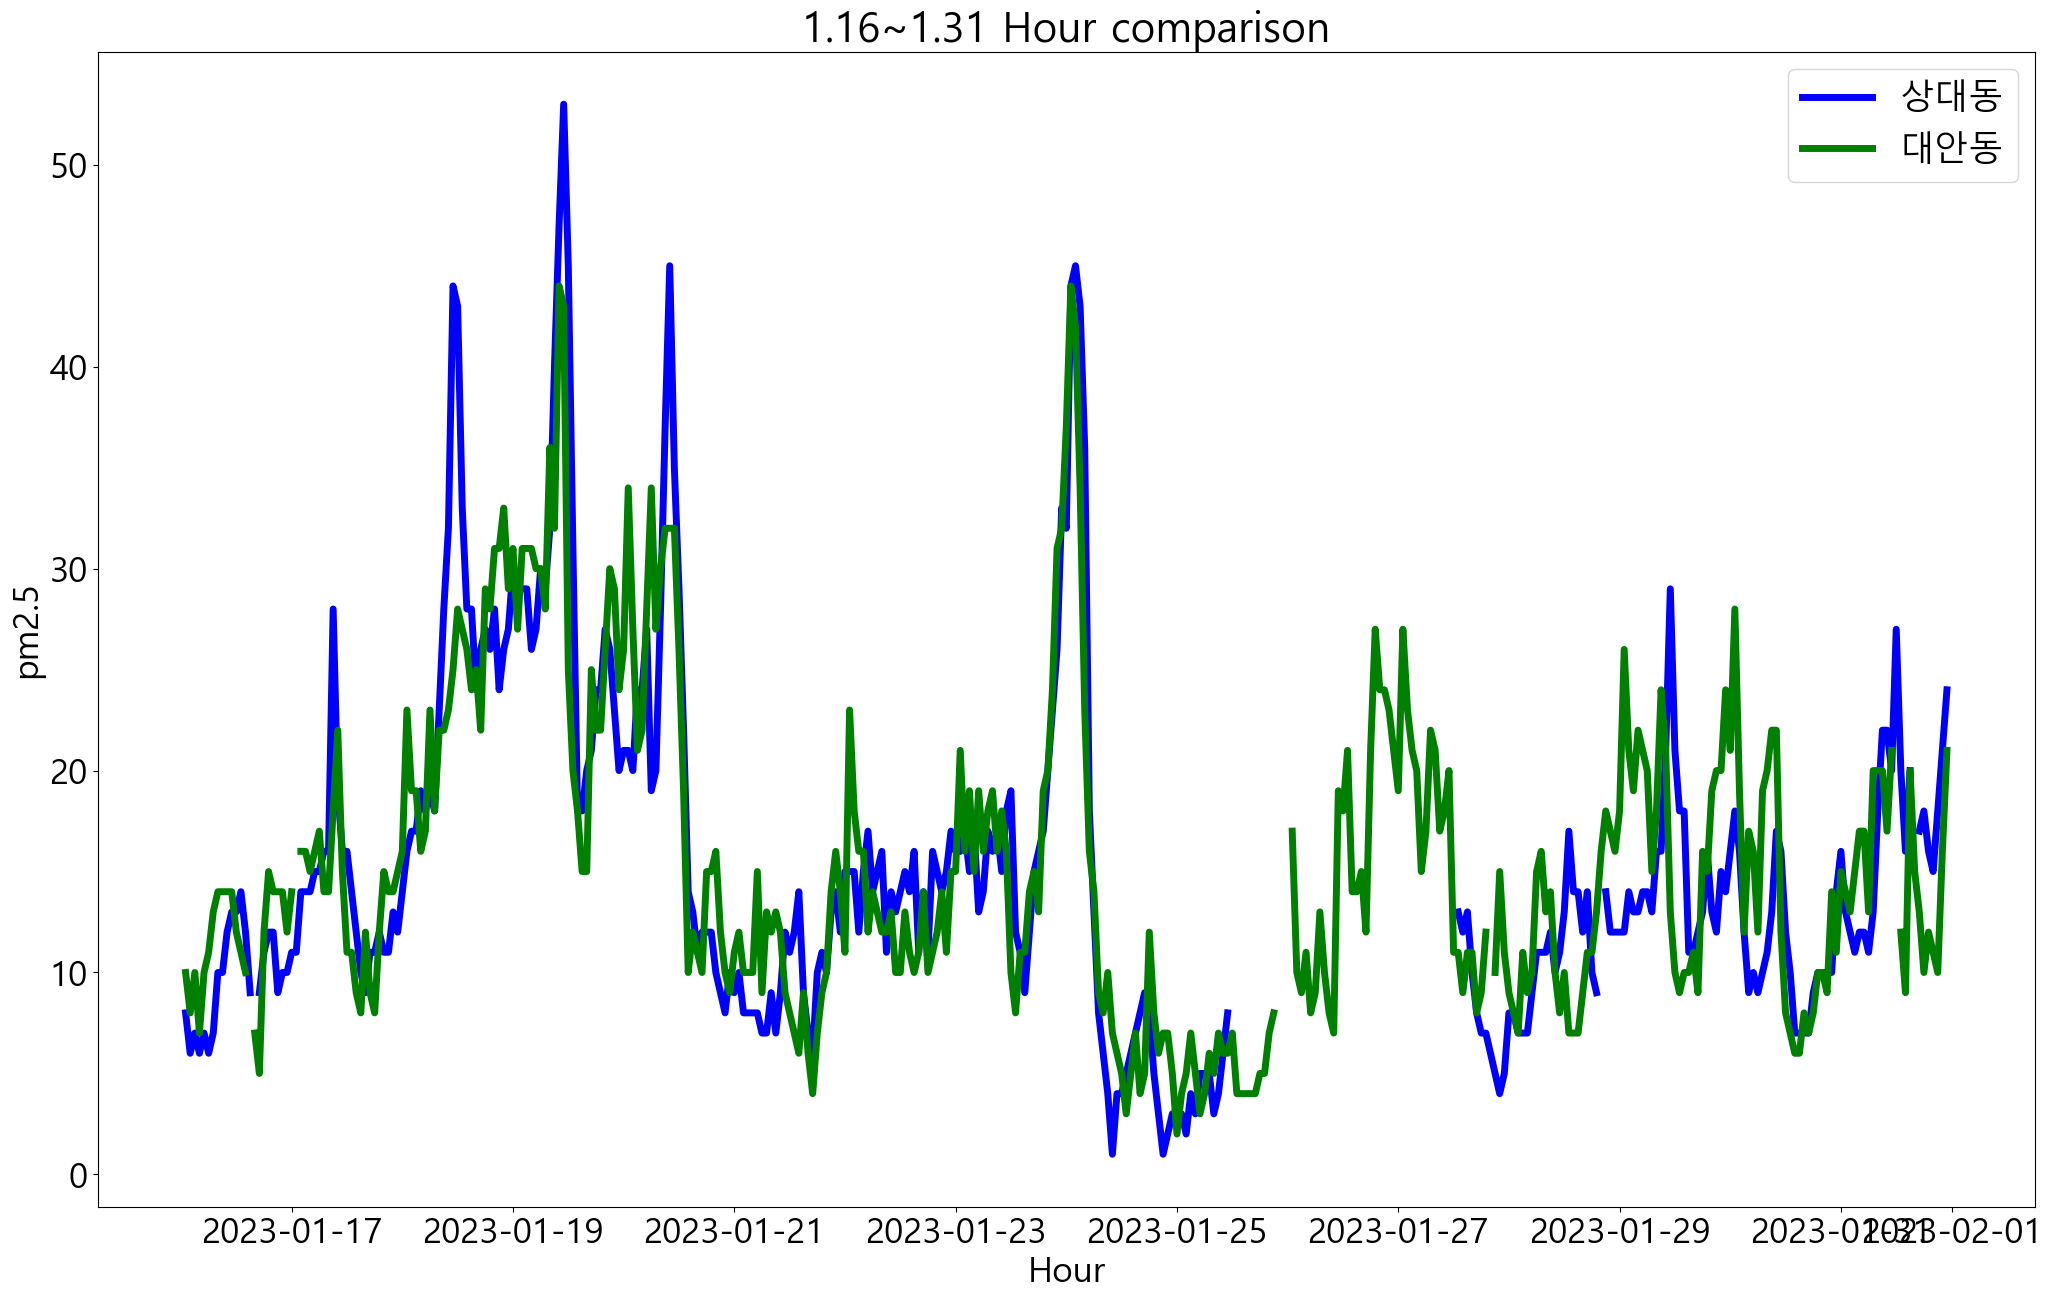

In [9]:
airKorea_data_sangdae = pd.read_csv('./AirKorea_상대동/AirKorea_01.16~01.31.csv')
airKorea_data_daean = pd.read_csv('./AirKorea_대안동/AirKorea_01.16~01.31.csv')


# airKorea_data 1.16~1.31 Hour
airKorea_data_sangdae['date'] = airKorea_data_sangdae.date.apply(pd.to_datetime)
airKorea_data_daean['date'] = airKorea_data_daean.date.apply(pd.to_datetime)


# 그래프 5개 비교
plt.plot(airKorea_data_sangdae.date, airKorea_data_sangdae.pm25, color="blue", linewidth="5")
plt.plot(airKorea_data_daean.date, airKorea_data_daean.pm25, color='green', linewidth="5")
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('상대동','대안동'))
plt.title('1.16~1.31 Hour comparison')
plt.show()

### 먼저 19일

In [6]:
# arim_data 1.16~1.31 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_01.16~01.31.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.16~1.31 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.16~01.31.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()


arim_data_avg = arim_data_avg.loc['2023-01-16 01:00:00':'2023-01-19 23:00:00']
airKorea_data_avg = airKorea_data_avg.loc['2023-01-16 01:00:00':'2023-01-19 23:00:00']


arim_peak_idx = arim_data_avg['pm25'].idxmax()
airKorea_peak_idx = airKorea_data_avg['pm25'].idxmax()

print("arim_peak(진주성) : ",arim_peak_idx)
print("airKorea_peak(상봉동)",airKorea_peak_idx)

arim_peak(진주성) :  2023-01-19 09:00:00
airKorea_peak(상봉동) 2023-01-19 09:00:00


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9696\3801842581.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


In [7]:
arim_data_1 = pd.read_csv('./OA200_1/OA2001_01.16~01.31.csv')
airKorea_data_sangdae = pd.read_csv('./AirKorea_상대동/AirKorea_01.16~01.31.csv')
airKorea_data_daean = pd.read_csv('./AirKorea_대안동/AirKorea_01.16~01.31.csv')

# arim_data 1.16~1.31 Hour

arim_data_1['reg_date'] = arim_data_1.reg_date.apply(pd.to_datetime)
arim_data_1_avg = arim_data_1.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.16~1.31 Hour
airKorea_data_sangdae['date'] = airKorea_data_sangdae.date.apply(pd.to_datetime)
airKorea_data_daean['date'] = airKorea_data_daean.date.apply(pd.to_datetime)
airKorea_data_sangdae_avg = airKorea_data_sangdae.groupby([pd.Grouper(key='date', freq='H')]).mean()
airKorea_data_daean_avg = airKorea_data_daean.groupby([pd.Grouper(key='date', freq='H')]).mean()


arim_data_1_avg = arim_data_1_avg.loc['2023-01-16 01:00:00':'2023-01-19 23:00:00']
airKorea_data_sangdae_avg = airKorea_data_sangdae_avg.loc['2023-01-16 01:00:00':'2023-01-19 23:00:00']
airKorea_data_daean_avg = airKorea_data_daean_avg.loc['2023-01-16 01:00:00':'2023-01-19 23:00:00']


arim_peak_1_idx = arim_data_1_avg['pm25'].idxmax()
airKorea_sangdae_peak_idx = airKorea_data_sangdae_avg['pm25'].idxmax()
airKorea_daean_peak_idx = airKorea_data_daean_avg['pm25'].idxmax()

print("arim_peak(학교) : ",arim_peak_1_idx)
print("airKorea_peak(상대동)",airKorea_sangdae_peak_idx)
print("airKorea_peak(대안동)",airKorea_daean_peak_idx)

arim_peak(학교) :  2023-01-19 09:00:00
airKorea_peak(상대동) 2023-01-19 11:00:00
airKorea_peak(대안동) 2023-01-19 10:00:00


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9696\1872637505.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  arim_data_1_avg = arim_data_1.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


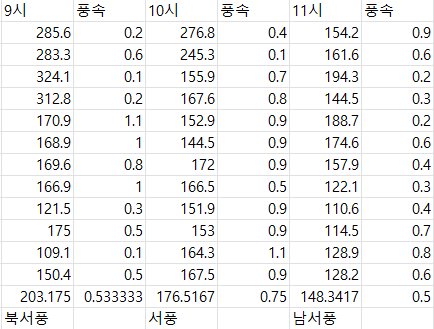

In [10]:
display(Image("./보고서 사진/발표사진/1월9일 9시~11시 상봉동.png"))

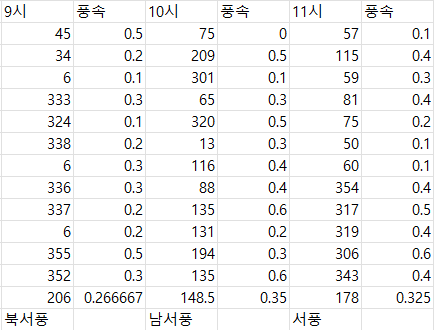

In [11]:
display(Image("./보고서 사진/발표사진/1월9일 9시~11시 상대동.png"))

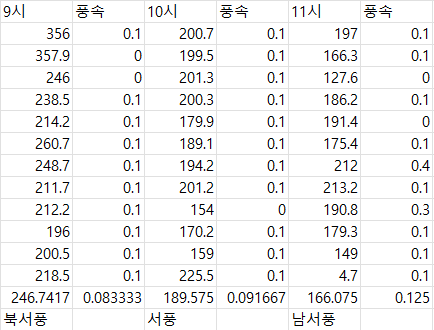

In [12]:
display(Image("./보고서 사진/발표사진/1월9일 9시~11시 대안동.png"))

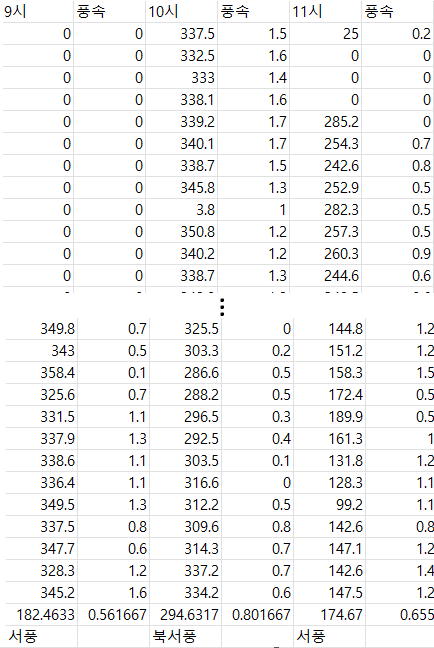

In [13]:
display(Image("./보고서 사진/발표사진/1월9일 9시~11시 정촌면(학교근처).png"))

### 그다음 24일

In [14]:
# arim_data 1.16~1.31 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_01.16~01.31.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.16~1.31 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.16~01.31.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_peak_idx = arim_data_avg['pm25'].idxmax()
airKorea_peak_idx = airKorea_data_avg['pm25'].idxmax()

print("arim_peak(진주성) : ",arim_peak_idx)
print("airKorea_peak(상봉동)",airKorea_peak_idx)

arim_peak(진주성) :  2023-01-24 00:00:00
airKorea_peak(상봉동) 2023-01-24 03:00:00


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9696\2175357705.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


In [15]:
arim_data_1 = pd.read_csv('./OA200_1/OA2001_01.16~01.31.csv')
airKorea_data_sangdae = pd.read_csv('./AirKorea_상대동/AirKorea_01.16~01.31.csv')
airKorea_data_daean = pd.read_csv('./AirKorea_대안동/AirKorea_01.16~01.31.csv')

# arim_data 1.16~1.31 Hour

arim_data_1['reg_date'] = arim_data_1.reg_date.apply(pd.to_datetime)
arim_data_1_avg = arim_data_1.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.16~1.31 Hour
airKorea_data_sangdae['date'] = airKorea_data_sangdae.date.apply(pd.to_datetime)
airKorea_data_daean['date'] = airKorea_data_daean.date.apply(pd.to_datetime)
airKorea_data_sangdae_avg = airKorea_data_sangdae.groupby([pd.Grouper(key='date', freq='H')]).mean()
airKorea_data_daean_avg = airKorea_data_daean.groupby([pd.Grouper(key='date', freq='H')]).mean()


arim_data_1_avg = arim_data_1_avg.loc['2023-01-19 23:00:00':]
# airKorea_data_sangdae_avg = airKorea_data_sangdae_avg.loc['2023-01-19 23:00:00':]
airKorea_data_sangdae_avg = airKorea_data_sangdae_avg.loc['2023-01-20 23:00:00':]
airKorea_data_daean_avg = airKorea_data_daean_avg.loc['2023-01-19 23:00:00':]


arim_peak_1_idx = arim_data_1_avg['pm25'].idxmax()
airKorea_sangdae_peak_idx = airKorea_data_sangdae_avg['pm25'].idxmax()
airKorea_daean_peak_idx = airKorea_data_daean_avg['pm25'].idxmax()

print("arim_peak(학교) : ",arim_peak_1_idx)
print("airKorea_peak(상대동)",airKorea_sangdae_peak_idx)
print("airKorea_peak(대안동)",airKorea_daean_peak_idx)

arim_peak(학교) :  2023-01-24 00:00:00
airKorea_peak(상대동) 2023-01-24 02:00:00
airKorea_peak(대안동) 2023-01-24 01:00:00


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9696\2563466398.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  arim_data_1_avg = arim_data_1.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


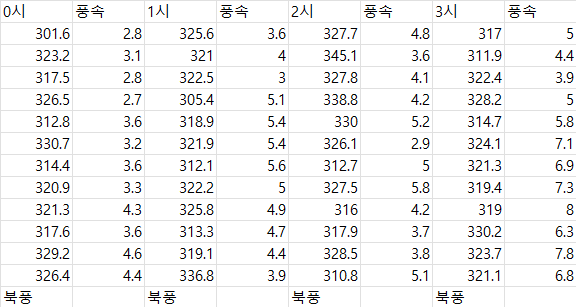

In [16]:
display(Image("./보고서 사진/발표사진/1월24일 0시~3시 상봉동.png"))

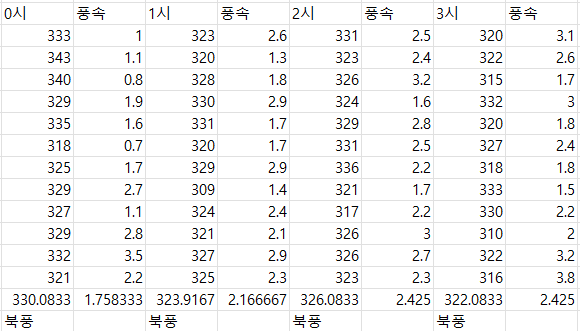

In [17]:
display(Image("./보고서 사진/발표사진/1월24일 0시~3시 상대동.png"))

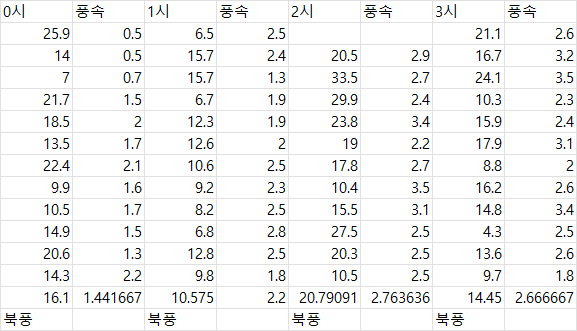

In [18]:
display(Image("./보고서 사진/발표사진/1월24일 0시~3시 대안동.png"))

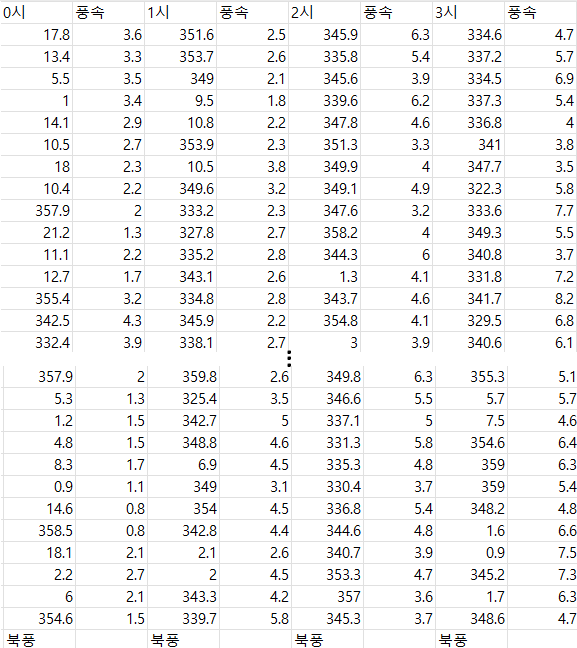

In [19]:
display(Image("./보고서 사진/발표사진/1월24일 0시~3시 정촌면(학교근처).png"))

위 데이터들로 예측해볼 수 있는 의미

풍향말고도 다른 큰 요인이 존재할 것이다.